<center><img src="images/banner.jpg"></center>

<center><h1>Análisis de sentimientos de las elecciones a la Asamblea de Madrid 2021</h1></center>



## Introducción

El pasado martes 4 de mayo se celebraban las elecciones a la Asamblea de Madrid 2021. Estas elecciones son de alguna forma excepcionales y polémicas desde el mismo instante de su convocatoria. Esto se debe a la pandemia y a la polarización política de los últimos años en España. Así pues, se han saldado con la victoria de los partidos derecha y la derrota de la izquierda, obligando a dos de los principales candidatos a abandonar la política. También hemos asistido a la desaparición del partido Ciudadanos de la Asamblea, empeorando aún más su crisis como partido. 

Por si fuera poco, la campaña electoral se desarrolló bajo un clima de mucha tensión, ya que algunos políticos del país recibieron sobres con balas. En las redes sociales, esta polarización se manifiesta más. Es frecuente ver insultos y descalificaciones en la mayoría de los mensajes.

Las elecciones de Madrid pueden afectar de alguna forma a elecciones futuras. Por tanto, es interesante analizar los sentimientos de los usuarios en redes —en este caso Twitter— con el objetivo de ver cómo se desarrolla esta polarización en todo el país.

### 🟢 Objetivo:

> Realizar un análisis de sentimientos en Twitter para ver el desarrollo de la polarización en España.

### 📚 Librerías

Para conseguir nuestro objetivo, necesitamos las siguientes librerías:

* **Tweepy**: la usaremos para descargar los tweets utilizando la API de Twitter.
* **Pandas**: librería para el análisis de los datos.

In [51]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sentiment_analysis_spanish import sentiment_analysis
import matplotlib.pyplot as plt
import random

## TODO: Extracción de tweets

## 🧹 Limpieza de datos

Una vez extraídos los tweets en un archivo CSV, el siguiente paso consiste en eliminar aquellos datos que no son importantes para el análisis. Para ello, vamos a usar la librería `Pandas`, que nos permitirá gestionar los tweets en tablas llamadas *Dataframes*.

In [29]:
# Importamos los datos a un Dataframe
data = pd.read_csv('data/data.csv', index_col='ID')

data.head()

,Tweets,len,Date,Source,Likes,RTs
ID,,,,,,
1389716466304491522,"RT @vox_es: ‼ @Santi_ABASCAL ""Son unos buenos ...",139,2021-05-04 22:59:59,Twitter for iPhone,0,0
1389716466195472388,RT @mtgarcia82: Que gane el PP en un barrio ob...,140,2021-05-04 22:59:59,Twitter for Android,0,0
1389716465390080002,"RT @elsitacabello: Ahora sí, lo puedo decir, m...",100,2021-05-04 22:59:59,Twitter for Android,0,0
1389716465205583877,RT @YTanRicamente: Esta casa apoya a @Yolanda_...,140,2021-05-04 22:59:59,Twitter Web App,0,0
1389716462936412164,RT @Juanmi_News: Qué asco tener que ver que lo...,138,2021-05-04 22:59:59,Twitter for Android,0,0


A continuación, vamos a hacer un análisis exploratorio para ver los datos que disponemos. Comprobaremos también si tenemos datos nulos y duplicados.

In [30]:
# Mostramos las filas y columnas del dataframe
data.shape

(1000, 6)

In [31]:
# Comprobamos valores nulos
data.isna().any()

Tweets    False
len       False
Date      False
Source    False
Likes     False
RTs       False
dtype: bool

In [32]:
# Eliminar la cadena 'RT' en los tweets para quedarnos con la información relevante
data['Tweets'] = data['Tweets'].str.replace(r'RT.*:', '', regex=True)

In [33]:
# Eliminar saltos de línea y retorno para tenerlo todo en una frase
data['Tweets'] = data['Tweets'].str.replace('\n', '')
data['Tweets'] = data['Tweets'].str.replace('\r', '')


In [34]:
# Eliminar etiqueta #Elecciones4M
data['Tweets'] = data['Tweets'].str.replace('#Elecciones4M', '')

In [35]:
# Eliminar links
links_index = data[data['Tweets'].str.contains(r'//t\.co.*', regex=True)].index
data = data.drop(links_index)

Seguimos haciendo limpieza de los datos, eliminando información que no es relevante para el análisis.

In [36]:
# Seguimos eliminando links
links_index = data[data['Tweets'].str.contains('//t.c…')].index
data = data.drop(links_index)
data.shape

(696, 6)

In [37]:
# Eliminamos filas con ruido
data = data.drop([1389714946599137283, 1389714670081265669, 1389714532499697667,
1389715033786040322, 1389714949367336965, 1389714934095880192, 1389714915737448451,
1389714894241554438, 1389714495413555202, 1389715170969231361, 1389715027356266502])

In [38]:
# Eliminar duplicados
data = data.drop_duplicates(subset=['Tweets'])

In [39]:
# Exportamos los datos preparados
data.to_csv('data/data_prepared.csv')

## Procesamiento del texto

Después de limpiar los datos, tenemos que hacer el procesamiento del texto.


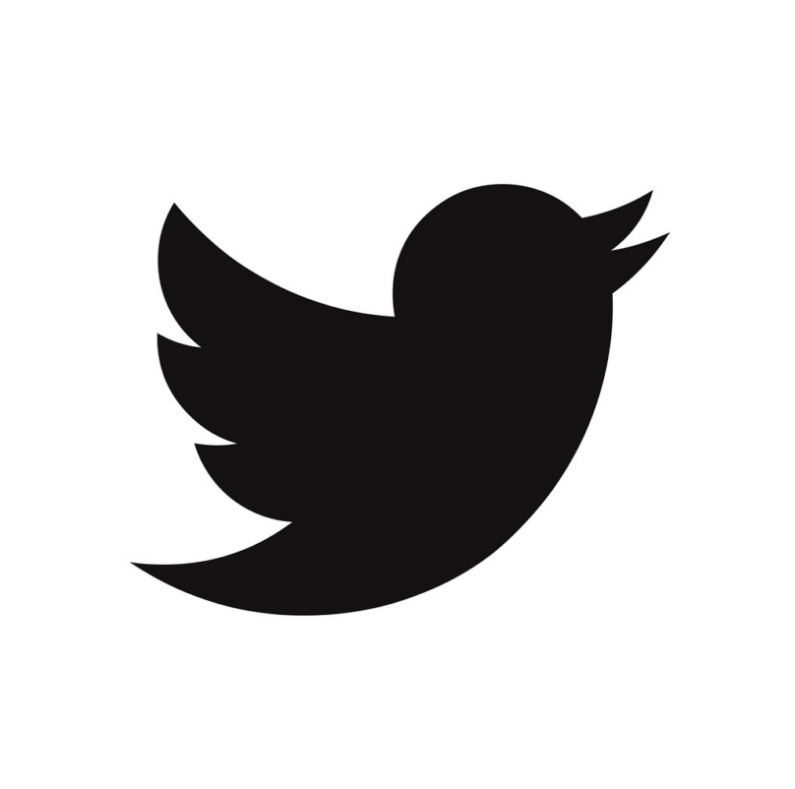

In [43]:
# Importamos la imagen del logo de Twitter
twitter_logo = np.array(Image.open('images/twitter_logo.png'))

figure = plt.figure()
figure.set_figwidth(14)
figure.set_figheight(18)

plt.imshow(twitter_logo)
plt.axis('off')
plt.show()

In [44]:
# Función para generar el color azul de la nube de tweets
def blue_color(word, font_size, position, orientation, ramdom_state=None, **kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

In [48]:
tweets_long_string = data['Tweets'].tolist()
tweets_long_string = " ".join(tweets_long_string)


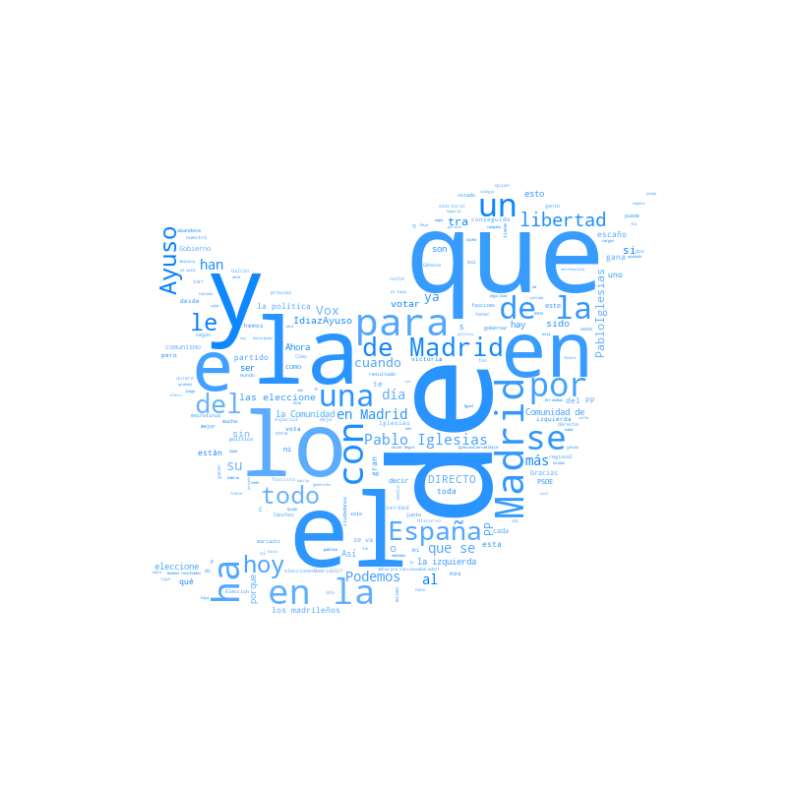

In [54]:
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=twitter_logo)

# Generamos la nube de palabras
twitter_wc.generate(tweets_long_string)

# Mostramos por pantalla la nube de palabras
figure = plt.figure()
figure.set_figwidth(14)
figure.set_figheight(18)

plt.imshow(twitter_wc.recolor(color_func=blue_color, random_state=3),interpolation="bilinear")
plt.axis("off")
plt.show()

